# THE SPARKS FOUNDATION


### TASK 1 - Prediction using Supervised ML 

###                                                   By Dasari Anil Reddy

##### To Predict the percentage of marks of the students based on the number of hours they studied

In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings # to ignore depreaction and other warnings
warnings.simplefilter('ignore')# to ignore deprecation and other warnings

## Reading data from the source

In [2]:
# imprting Dataset===>
path='http://bit.ly/w-data'
data=pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking  if there are  any null value in the Dataset
data.isnull == True

False

### there is no null value , so we caam proceed further 

In [4]:
#here we use describe() method  to see percentiles,mean,std,max,count of the given dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Let's print the full summary of the dataframe .
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


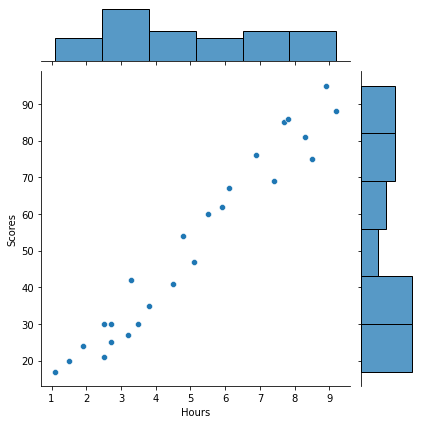

In [6]:
import warnings 
# to ignore depreaction and other warnings
warnings.simplefilter('ignore')

sns.jointplot(data['Hours'],data['Scores'])

corr=data.corr()

print(corr)

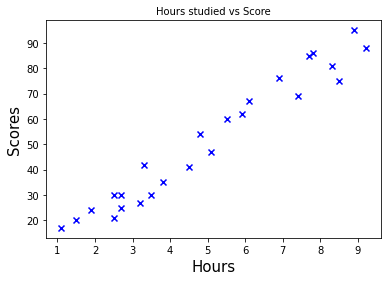

In [7]:
#ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='blue',marker='x')
plt.show()

## This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring

In [8]:
X = data.iloc[:,: -1].values  
y = data.iloc[:, 1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Data and splitting into train and test sets

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [11]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (18, 1)
Y train.shape = (18,)
X test.shape  = (7, 1)
Y test.shape  = (7,)


In [12]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [13]:
print("β0 =",regr.intercept_,"\nβ1 =",regr.coef_)
# β0 is Intercept & Slope of the line is β1.,"

β0 = 1.9322042531516601 
β1 = [9.94167834]


In [14]:
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

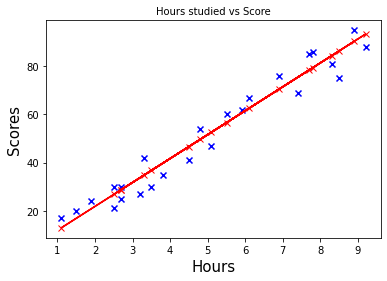

In [15]:
#ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='blue',marker='x')
plt.plot(X_train,regr.predict(X_train),color='red',marker='x')
plt.show()

In [16]:
#predicting the Scores for test data
pred_score=regr.predict(X_test)

In [17]:
# Now print y_test
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

## comparing the actual and predicted scores

In [18]:
compare_scores = pd.DataFrame({'Actual_Marks': y_test, 'Predicted_Marks':pred_score})
compare_scores

,Actual_Marks,Predicted_Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


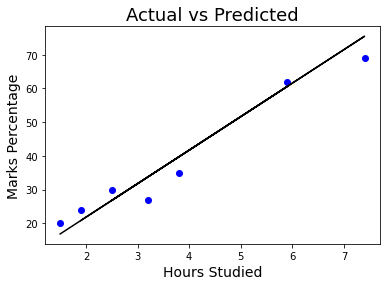

In [19]:
#plotting the line on test data
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_score, color='Black')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

## ACCURACY OF THE MODEL

In [20]:
# goodness of the fit test
from sklearn import metrics
print('accuracy of test_data and pred_score r-squared:', metrics.r2_score(y_test,pred_score))

accuracy of test_data and pred_score r-squared: 0.9367661043365056


### Above 93% score is a good model

## predicting error of the model

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE =metrics.mean_squared_error(y_test, pred_score)
root_E = np.sqrt(metrics.mean_squared_error(y_test, pred_score))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test, pred_score))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)


Mean Squared Error      =  20.33292367497996
Root Mean Squared Error =  4.509204328368805
Mean Absolute Error     =  4.509204328368805


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less

#  The predicted score of a student if he/she studies for 9.25 hrs/ day?

In [22]:
hours = [9.25]
Answer = regr.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(Answer[0],3)))
#predicet

Predicted Score for 9.25 hours/day = 93.893


## #Conclusion:
### From to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.